<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [14]:
# Utilice este espacio para escribir el código.
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


# Cargamos y visualizamos la primeras observaciones de los datos
clientes = pd.read_csv('data/datos_clientes.csv')

In [9]:
clientes

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54
...,...,...,...,...,...
195,196,Mujer,30,19322.17,72
196,197,Mujer,50,43486.37,45
197,198,Hombre,35,24086.95,35
198,199,Mujer,24,38599.28,65


In [22]:
Clientes_codificado = pd.get_dummies(clientes,columns=["Genero"])
Clientes_codificado.drop("Genero_Mujer", axis="columns", inplace= True)
Clientes_codificado.rename(columns  = {"Genero_Hombre":"Genero"}, inplace= True)
Clientes_codificado


,Id_Cliente,Edad,Ingreso,Puntaje_Gasto,Genero
0,1,41,98115.05,39,0
1,2,20,35458.14,75,0
2,3,68,59872.08,55,0
3,4,63,48508.93,51,1
4,5,31,44431.11,54,0
...,...,...,...,...,...
195,196,30,19322.17,72,0
196,197,50,43486.37,45,0
197,198,35,24086.95,35,1
198,199,24,38599.28,65,0


In [26]:
# Definir los límites de los grupos etarios
edades_bins = [18, 25, 35, 45, 55, 65, float('inf')]  # Los límites de cada grupo etario

# Utilizar la función cut para crear una nueva columna 'Grupo Etario'
Clientes_codificado['Grupo_Etario'] = pd.cut(Clientes_codificado['Edad'], bins=edades_bins, labels=False)+1

# Mostrar el DataFrame con los grupos etarios
print(Clientes_codificado)

     Id_Cliente  Edad   Ingreso  Puntaje_Gasto  Genero  Grupo_Etario
0             1    41  98115.05             39       0           3.0
1             2    20  35458.14             75       0           1.0
2             3    68  59872.08             55       0           6.0
3             4    63  48508.93             51       1           5.0
4             5    31  44431.11             54       0           2.0
..          ...   ...       ...            ...     ...           ...
195         196    30  19322.17             72       0           2.0
196         197    50  43486.37             45       0           4.0
197         198    35  24086.95             35       1           2.0
198         199    24  38599.28             65       0           1.0
199         200    36  86546.01             75       0           3.0

[200 rows x 6 columns]


Se cargaron los datos y se muestra una tabla de 5 columnas y 200 registros. Adicionalmente se realizaron las transformaciones de las variables para organizar el data frame para los analisis. La variable genero se transformo a una variable dicotomica y se creo el grupo etario para los 200 registros.

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [30]:
# Utilice este espacio para escribir el código.
# Hombres
Clientes_codificado[Clientes_codificado["Genero"]==1].describe()


,Id_Cliente,Edad,Ingreso,Puntaje_Gasto,Genero,Grupo_Etario
count,88.000000,88.000000,88.000000,88.000000,88.0,85.000000
mean,103.318182,39.806818,62126.660455,48.511364,1.0,3.058824
std,57.000211,15.514812,26765.492953,27.896770,0.0,1.576259
min,4.000000,18.000000,13458.020000,1.000000,1.0,1.000000
25%,59.750000,27.750000,45003.080000,24.500000,1.0,2.000000
50%,107.500000,37.000000,61706.565000,50.000000,1.0,3.000000
75%,152.250000,50.500000,77731.302500,70.000000,1.0,4.000000
max,198.000000,70.000000,138584.520000,97.000000,1.0,6.000000


In [31]:
# Mujeres
Clientes_codificado[Clientes_codificado["Genero"]==0].describe()

,Id_Cliente,Edad,Ingreso,Puntaje_Gasto,Genero,Grupo_Etario
count,112.000000,112.000000,112.000000,112.000000,112.0,111.000000
mean,98.285714,38.098214,59444.135714,51.526786,0.0,2.765766
std,58.720352,12.644095,25920.459216,24.114950,0.0,1.327711
min,1.000000,18.000000,15766.840000,5.000000,0.0,1.000000
25%,46.750000,29.000000,40013.412500,35.000000,0.0,2.000000
50%,94.500000,35.000000,59355.305000,50.000000,0.0,2.000000
75%,149.250000,47.500000,76788.387500,73.000000,0.0,4.000000
max,200.000000,68.000000,126685.780000,99.000000,0.0,6.000000


Encontramos que la base cuenta con 112 mujeres fernte a 88 hombres, el promedio del la segmentación de grupo etario es mayor en los hombres, adicionalmente se videncia que los ingresos en los hombres son generalemente mayores que los ingresos de las mujeres y que las mujeres compran mas a menudo en la rienda en comparación con los hombres. 

Analisis preliminar Hombres




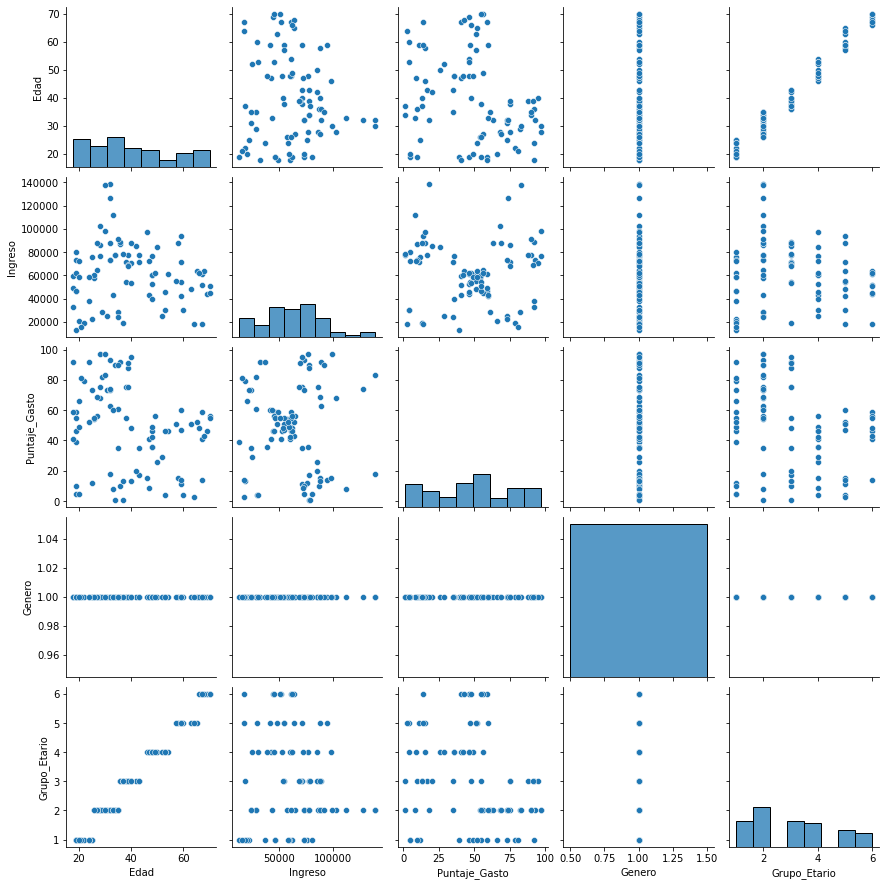

In [34]:
#
Hombres=pd.DataFrame(Clientes_codificado[Clientes_codificado["Genero"]==1])

sns.pairplot(Hombres.iloc[:,1:], kind="scatter")
print("Analisis preliminar Hombres\n\n")

plt.show()

Analisis preliminar Mujeres




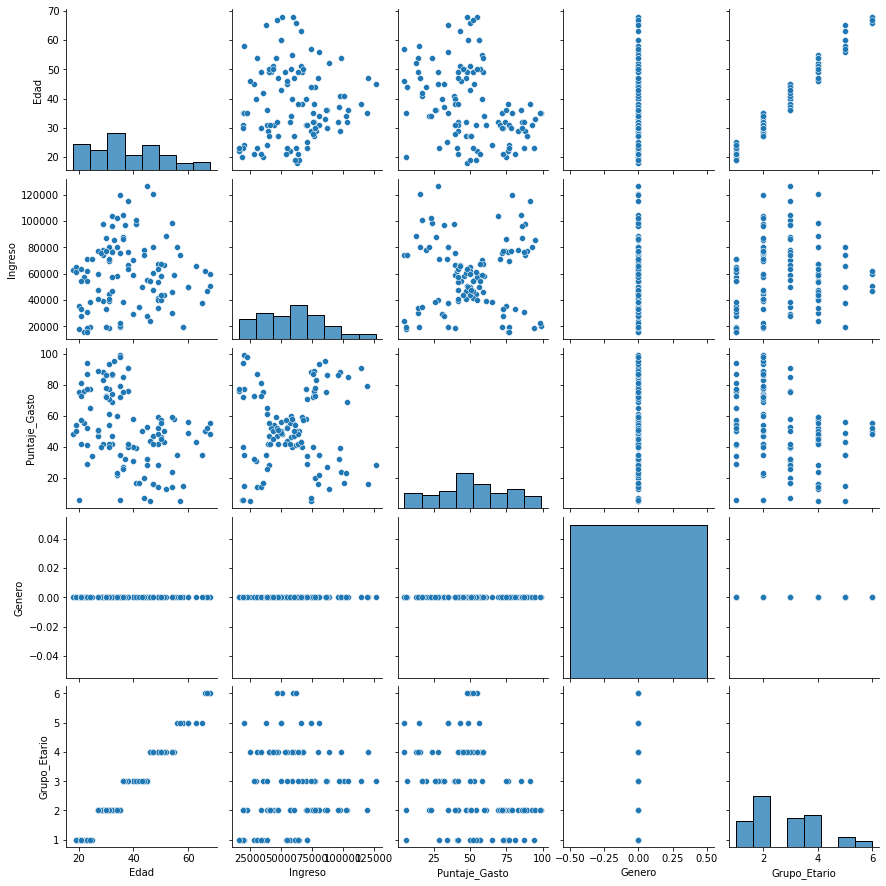

In [35]:
mujeres = pd.DataFrame(Clientes_codificado[Clientes_codificado["Genero"]==0])

sns.pairplot(mujeres.iloc[:,1:], kind="scatter")
print("Analisis preliminar Mujeres\n\n")
plt.show()

Los Graficos nos reafirman lo encontrado en las tablas descriptivas expuestas anteriormente. No se evidencian distribuciones de probabilidad de los datos. se muestran una dispersión de los datos entre gasto e ingreso que podria ayudar a clasificar los registros en grupos.

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

In [37]:
# Utilice este espacio para escribir el código.
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

X = Clientes_codificado.drop(["Id_Cliente","Edad", "Genero", "Grupo_Etario"], axis="columns")
media=X.mean()
des_est=X.std()
X_std= (X-media)/des_est
X_std

,Ingreso,Puntaje_Gasto
0,1.427512,-0.433713
1,-0.958245,0.960365
2,-0.028648,0.185877
3,-0.461317,0.030980
4,-0.616586,0.147153
...,...,...
195,-1.572647,0.844192
196,-0.652558,-0.201367
197,-1.391221,-0.588611
198,-0.838642,0.573121


Dendograma sin Estandarizar




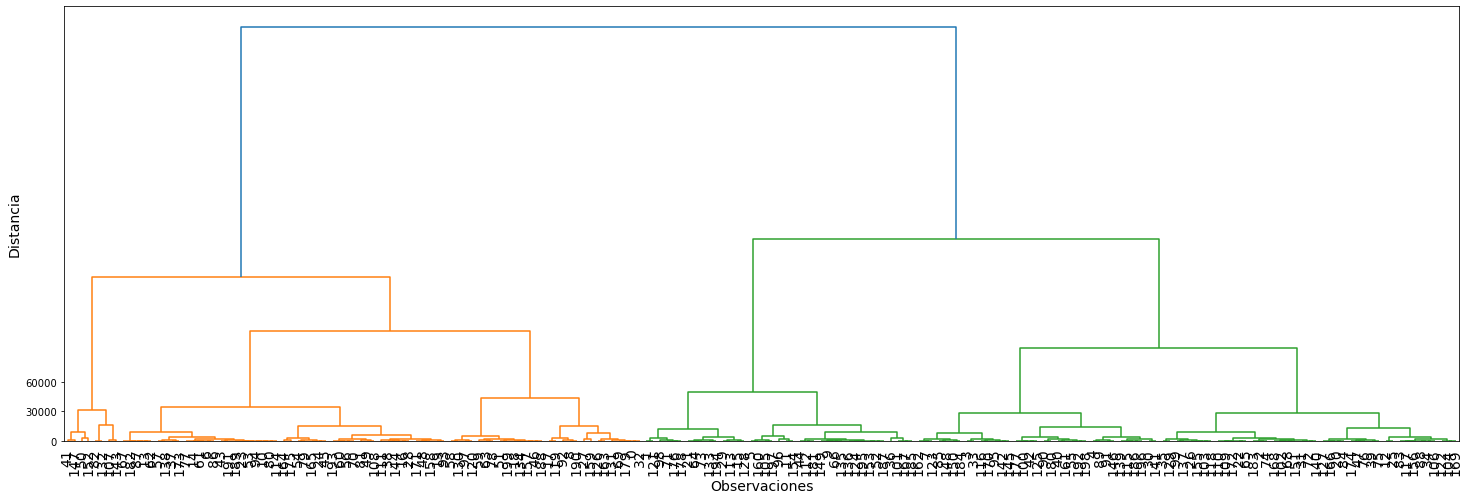

In [52]:
dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')

from scipy.cluster.hierarchy import dendrogram

print("Dendograma sin Estandarizar\n\n")

fig, ax = plt.subplots(figsize=(25, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 90000, 30000))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

Dendograma Estandarizado




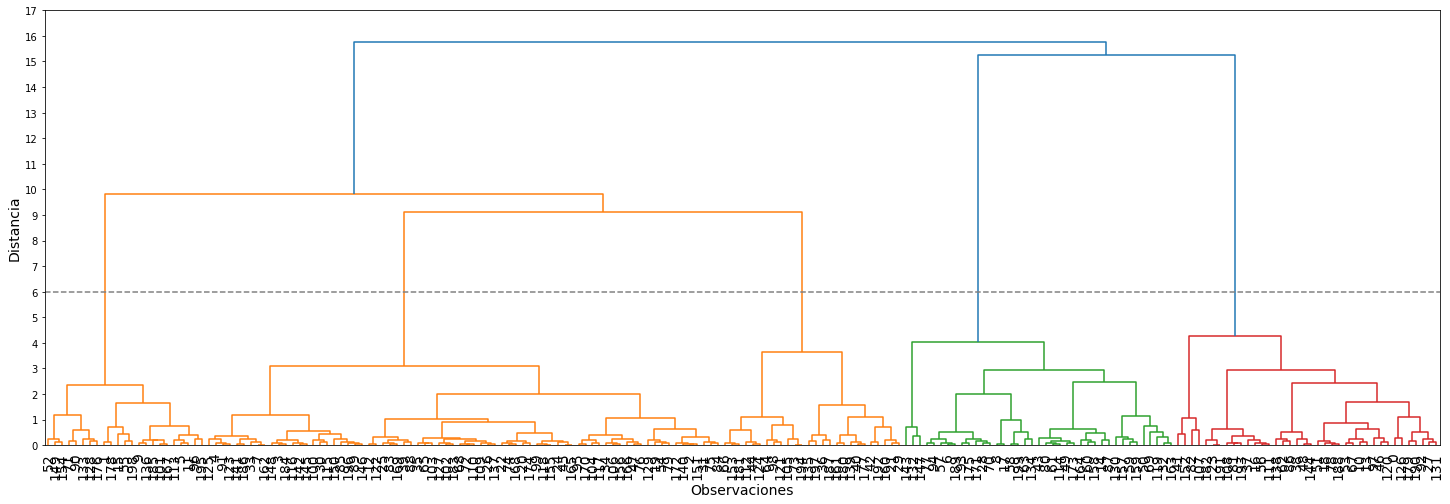

In [56]:
dist = pdist(X_std, metric='euclidean')
Z = linkage(dist, method='ward')

from scipy.cluster.hierarchy import dendrogram

print("Dendograma Estandarizado\n\n")

fig, ax = plt.subplots(figsize=(25, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 18, 1))
ax.set_ylabel('Distancia', fontsize=14)
plt.axhline(y = 6, color = 'grey', linestyle = '--')
plt.show()

Dado que estamos utilizando las variables de ingresos y puntaje de gasto es importante realizar la estandarización dado que no manejamos las mismas unidades; el ingreso esta en moneda y el puntaje de gasto es una calificación de acuerdo a unos criterios. Debido a lo anterior la estandarización nos permite manejar las dos variables como los mismos datos y evitar los efectos de datos atipicos.

Complementando al realizar un dendograma sin estandarizar y uno estandarizado, evidenciamos que la estandarización de las variables ayuda a una mejor identificación de los clusters ya que por ejemplo en el primer grafico dos niveles principales (Naranja y Verde) y en el estandarizado se observan un nivel adicional (rojo).

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

In [61]:
# Utilice este espacio para escribir el código.
numero_clusters = 5 

De acuerdo al grafico anterior, evidenciamos que al realizar un corte en la distacia 6 (linea gris) capturamos 5 clusters. que gruardamos en la variable numero_clusters.

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

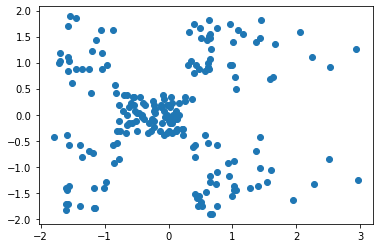

In [58]:
#visualizamos los datos
plt.scatter(X_std["Ingreso"], X_std["Puntaje_Gasto"])
plt.show()

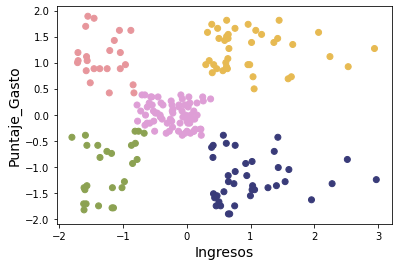

In [65]:
from sklearn.cluster import AgglomerativeClustering

cluster_sk = AgglomerativeClustering(n_clusters=numero_clusters, affinity='euclidean', linkage='ward')
cluster_sk =cluster_sk.fit_predict(X_std)

plt.scatter(X_std["Ingreso"], X_std["Puntaje_Gasto"], c=cluster_sk, cmap='tab20b')
plt.xlabel('Ingresos', fontsize=14)
plt.ylabel('Puntaje_Gasto', fontsize=14)
plt.show()

Se cuenta con 5 grupos, que podriamos caracterizar de la siguiente manera:
- Grupo Verde: personas con bajo ingreso que a su vez tienen una puntuación de gasto menor
- Grupo Rosa: personas con bahos ingreso pero compran mas a menudo en la tienda
- Grupo Morado: personas promedio, ingreso medio y puntuación media 
- Grupo Amarillo: Personas que tienen un ingreso alto y a su vez tienen una puntuación de gasto mayor 
- Grupo Azul: Personas que tienen un ingreso alto pero no compran muy a menudo en la tienda.

De acuerdo a la caracterización anterior se idean dos estrategias. 

La estrategia principal estaria enfocada en el grupo Azul dado que son personas que tienen la capacidad economica en realizar mas gastos y han realizado algunad compras en la tienda. Son cliente potenciales que con una estrategia focalizada pueden llevarse al grupo Amarillo. 

En segunda medida es reallizar el mismo procedimiento pero con los clientes que conforman el grupo verde, y despues de la estrategia logren alcanzar al grupo Rosa. 

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

In [91]:
# Cargamos NeighborsNeighbors
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

min_samples = 4
neigh = NearestNeighbors(n_neighbors = 4)
nbrs = neigh.fit(X_std)
distancias, indices = nbrs.kneighbors(X_std)
distancias = np.sort(distancias.flatten())
 
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
eps = distancias[knee.knee]
print(f"Epsilon = {round(eps, 4)}")
print(f"min_samples = {min_samples}")


Epsilon = 0.2456
min_samples = 4


se utiliza la libreria kneed para generar el numero del epsilon mas cercano obteniendo el 0.2456, asi mismo como solo trabajamos con dos dimensiones (ingreso, puntaje_costo), bajo la teoria deberiamos irnos solamente con 4 min_samples.

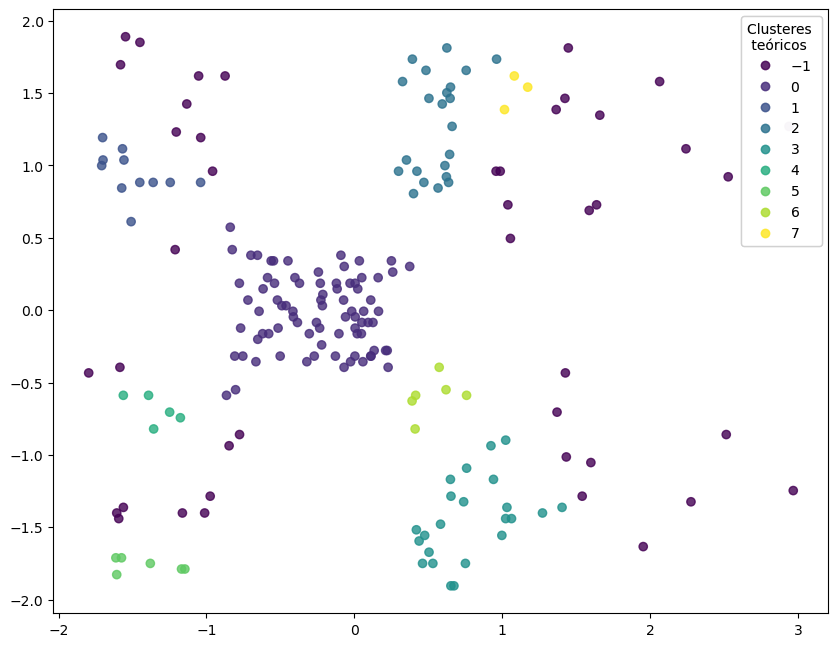

In [92]:
from sklearn.cluster import DBSCAN
 
db = DBSCAN(eps=eps, min_samples= min_samples)
clusters=db.fit_predict(X_std)
 
fig, ax = plt.subplots(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
g = plt.scatter(X_std["Ingreso"], X_std["Puntaje_Gasto"], c = clusters, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
ax.add_artist(legend)
plt.show()

Se cuenta con 8 grupos 3 mas que en el resultado anterior, estos grupos los podriamos caracterizar de la siguiente manera:
- Grupo 7: personas con alto ingreso que a su vez tienen una puntuación de gasto mayor
- Grupo 6: personas con alto ingreso pero compran menos a menudo en la tienda
- Grupo 5: personas con más bajo ingreso y puntiación más baja 
- Grupo 4: Personas con bajo ingreso alto y a su vez tienen una puntuación de gasto menor pero mayor que el grupo 5  
- Grupo 3: Personas que tienen un ingreso alto y no compran a menudo en la tienda.
- Grupo 2: Personas que tienen un ingreso alto y no compran a menudo en la tienda, compran mas que el grupo 3.
- Grupo 1: Personas que tienen un ingreso bajo y compran a menudo en la tienda, compran mas que el grupo 5.
- Grupo 0: personas promedio, ingreso medio y puntuación media.

De acuerdo a la caracterización anterior y con lo obtenido en el punto 3 no cambiariamos de estrategia, dado que el cluster se divide en dos grupos y quizas las estrategia para el grupo 6 y grupo 3 se mas focalizada; el objetivo es conseguir llevarlos al grupo 7. 

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [108]:
# Utilice este espacio para escribir el código.
X_2 = Clientes_codificado.drop(["Id_Cliente","Edad"], axis="columns")
media=X_2.mean()
des_est=X_2.std()
X_std_2= (X_2-media)/des_est
X_std_2= round(X_std_2, 3)  
X_std_2

,Ingreso,Puntaje_Gasto,Genero,Grupo_Etario
0,1.428,-0.434,-0.884,0.074
1,-0.958,0.960,-0.884,-1.311
2,-0.029,0.186,-0.884,2.151
3,-0.461,0.031,1.125,1.459
4,-0.617,0.147,-0.884,-0.618
...,...,...,...,...
195,-1.573,0.844,-0.884,-0.618
196,-0.653,-0.201,-0.884,0.767
197,-1.391,-0.589,1.125,-0.618
198,-0.839,0.573,-0.884,-1.311


In [107]:
min_samples_2 = 8
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X_std_2)
distancias, indices = nbrs.kneighbors(X_std_2)
distancias = np.sort(distancias.flatten())
 
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
eps_2 = distancias[knee.knee]
print(f"Epsilon = {round(eps_2, 4)}")
print(f"min_samples = {min_samples_2}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

(Utilice este espacio para describir su procedimiento)